In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/tobia/Repos/randomstats/stackoverflow/survey_2019/survey_results_public.csv')

In [3]:
# Create df for USA, UK, Germany, Poland and Ukraine (professional devs)
pro_fltr = (df.loc[:, 'MainBranch'] == 'I am a developer by profession') | (df.loc[:, 'MainBranch'] == 'I am not primarily a developer, but I write code sometimes as part of my work')
us_fltr = (df.loc[:, 'Country'] == 'United States') & (pro_fltr)
us_df = df.loc[us_fltr, :]
uk_fltr = (df.loc[:, 'Country'] == 'United Kingdom') & (pro_fltr)
uk_df = df.loc[uk_fltr, :]
germ_fltr = (df.loc[:, 'Country'] == 'Germany') & (pro_fltr)
germ_df = df.loc[germ_fltr, :]
pl_fltr = (df.loc[:, 'Country'] == 'Poland') & (pro_fltr)
pl_df = df.loc[pl_fltr, :]
ua_fltr = (df.loc[:, 'Country'] == 'Ukraine') & (pro_fltr)
ua_df = df.loc[ua_fltr, :]

In [4]:
# Create df with salaries and operating systems for all countries (professional devs)
us_sys_salary_df = us_df.loc[:, ['OpSys', 'ConvertedComp']]
us_sys_salary_df = us_sys_salary_df.dropna()
uk_sys_salary_df = uk_df.loc[:, ['OpSys', 'ConvertedComp']]
uk_sys_salary_df = uk_sys_salary_df.dropna()
germ_sys_salary_df = germ_df.loc[:, ['OpSys', 'ConvertedComp']]
germ_sys_salary_df = germ_sys_salary_df.dropna()
pl_sys_salary_df = pl_df.loc[:, ['OpSys', 'ConvertedComp']]
pl_sys_salary_df = pl_sys_salary_df.dropna()
ua_sys_salary_df = ua_df.loc[:, ['OpSys', 'ConvertedComp']]
ua_sys_salary_df = ua_sys_salary_df.dropna()

In [10]:
# Create df with salaries (alle respondents)
sys_salary_df = df.loc[:, ['OpSys', 'ConvertedComp']]
sys_salary_df = sys_salary_df.dropna()

In [11]:
# Mean salary by used OS (all respondents)
sys_salary_df.groupby('OpSys').mean().apply(lambda x: round(x, 2))

,ConvertedComp
OpSys,
BSD,150428.06
Linux-based,115648.74
MacOS,151357.34
Windows,116282.38


In [12]:
# Median salary by used OS (all respondents)
sys_salary_df.groupby('OpSys').median().apply(lambda x: round(x, 2))

,ConvertedComp
OpSys,
BSD,72809.5
Linux-based,49722.0
MacOS,72000.0
Windows,51000.0


In [32]:
# Mean salary by used OS (pro devs, country to choose)
ua_sys_salary_df.groupby('OpSys').mean().apply(lambda x: round(x, 2))

,ConvertedComp
OpSys,
BSD,39758.00
Linux-based,25288.21
MacOS,42533.71
Windows,31804.53


In [29]:
# Median salary by used OS (pro devs, country to choose)
germ_sys_salary_df.groupby('OpSys').median().apply(lambda x: round(x, 2))

,ConvertedComp
OpSys,
BSD,75621.5
Linux-based,60725.0
MacOS,68745.0
Windows,59065.0


In [43]:
# Create df with separate column for how number of languages (for Us)
us_languages_df = us_df.loc[:, ['LanguageWorkedWith', 'ConvertedComp']]
us_languages_df = us_languages_df.dropna()
us_languages_df['num_langs'] = us_languages_df['LanguageWorkedWith'].apply(lambda langs: len(langs.split(';')))

<BarContainer object of 11 artists>

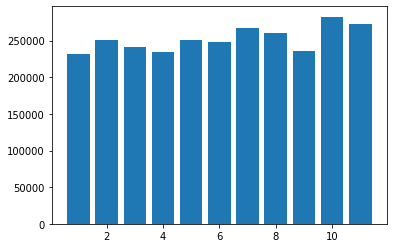

In [44]:
# Bar plot to show if salary depends on number of languages (for US)
money_langs = us_languages_df.groupby('num_langs').agg('mean')
money_langs = money_langs.reset_index()
money_langs = money_langs[money_langs['num_langs'] < 12]
plt.bar(money_langs['num_langs'], money_langs['ConvertedComp'])

In [49]:
# Count how many devs are there using each OS (for US)
win_fltr = us_df.loc[:, 'OpSys'] == 'Windows'
win_devs = us_df.loc[win_fltr, 'OpSys'].count()
mac_fltr = us_df.loc[:, 'OpSys'] == 'MacOS'
mac_devs = us_df.loc[mac_fltr, 'OpSys'].count()
linux_fltr = us_df.loc[:, 'OpSys'] == 'Linux-based'
linux_devs = us_df.loc[linux_fltr, 'OpSys'].count()
bsd_fltr = us_df.loc[:, 'OpSys'] == 'BSD'
bsd_devs = us_df.loc[bsd_fltr, 'OpSys'].count()

In [45]:
# Create df with number of devs coding in each language on different OSes (for US)
us_lang_os_df = us_df.loc[:, ['OpSys', 'LanguageWorkedWith']]
us_lang_os_df = us_lang_os_df.dropna()
langs_dict = {}
for row in us_lang_os_df.iterrows():
    languages = row[1]['LanguageWorkedWith'].split(';')
    if row[1]['OpSys'] not in langs_dict:
        langs_dict[row[1]['OpSys']] = {}
    for language in languages:
        if language not in langs_dict[row[1]['OpSys']]:
            langs_dict[row[1]['OpSys']][language] = 1
        else:
            langs_dict[row[1]['OpSys']][language] += 1

us_lang_os_df = pd.DataFrame(langs_dict)

In [13]:
# Add percentage of users of particular Os, who code in each language (for US)
us_lang_os_df['perc_of_win'] = round(us_lang_os_df['Windows']/win_devs, 2)
us_lang_os_df['perc_of_mac'] = round(us_lang_os_df['MacOS']/mac_devs, 2)
us_lang_os_df['perc_of_linux'] = round(us_lang_os_df['Linux-based']/linux_devs, 2)
us_lang_os_df['perc_of_bsd'] = round(us_lang_os_df['BSD']/bsd_devs, 2)
us_lang_os_df

,Windows,MacOS,Linux-based,BSD,perc_of_win,perc_of_mac,perc_of_lin,perc_of_bsd
C,1218,978,1423,19,0.14,0.13,0.33,0.66
C++,1863,1053,1572,8,0.21,0.14,0.36,0.28
C#,5029,1128,571,4,0.58,0.15,0.13,0.14
Python,3257,3722,3002,18,0.38,0.48,0.70,0.62
SQL,5564,4019,2139,15,0.64,0.52,0.50,0.52
Bash/Shell/PowerShell,3356,3503,2687,21,0.39,0.45,0.62,0.72
HTML/CSS,5885,5093,2376,14,0.68,0.66,0.55,0.48
JavaScript,6084,5822,2637,14,0.70,0.75,0.61,0.48
PHP,1443,1635,829,11,0.17,0.21,0.19,0.38
TypeScript,2138,1763,642,6,0.25,0.23,0.15,0.21


In [51]:
# Create df with number of people on different positions using different OSes plus percentage columns (for US)
us_devtype_os_df = us_df.loc[:, ['OpSys', 'DevType']]
us_devtype_os_df = us_devtype_os_df.dropna()
langs_dict = {}
for row in us_devtype_os_df.iterrows():
    languages = row[1]['DevType'].split(';')
    if row[1]['OpSys'] not in langs_dict:
        langs_dict[row[1]['OpSys']] = {}
    for language in languages:
        if language not in langs_dict[row[1]['OpSys']]:
            langs_dict[row[1]['OpSys']][language] = 1
        else:
            langs_dict[row[1]['OpSys']][language] += 1

us_devtype_os_df = pd.DataFrame(langs_dict)

us_devtype_os_df = us_devtype_os_df.fillna(0)
us_devtype_os_df = us_devtype_os_df.astype(int)
us_devtype_os_df['perc_of_win'] = round(us_devtype_os_df['Windows']/win_devs, 2)
us_devtype_os_df['perc_of_mac'] = round(us_devtype_os_df['MacOS']/mac_devs, 2)
us_devtype_os_df['perc_of_linux'] = round(us_devtype_os_df['Linux-based']/linux_devs, 2)
us_devtype_os_df['perc_of_bsd'] = round(us_devtype_os_df['BSD']/bsd_devs, 2)
us_devtype_os_df

,Windows,MacOS,Linux-based,BSD,perc_of_win,perc_of_mac,perc_of_linux,perc_of_bsd
"Developer, full-stack",4410,3915,1693,5,0.60,0.56,0.47,0.23
Data or business analyst,991,358,236,2,0.13,0.05,0.07,0.09
Database administrator,1140,563,474,6,0.16,0.08,0.13,0.27
"Developer, back-end",3374,3024,1911,12,0.46,0.44,0.53,0.55
"Developer, desktop or enterprise applications",2387,739,589,1,0.32,0.11,0.16,0.05
"Developer, front-end",2512,2326,804,2,0.34,0.33,0.22,0.09
"Developer, mobile",762,1344,270,1,0.10,0.19,0.07,0.05
DevOps specialist,805,805,629,5,0.11,0.12,0.17,0.23
"Engineer, data",564,551,419,0,0.08,0.08,0.12,0.00
"Engineer, site reliability",211,383,307,3,0.03,0.06,0.08,0.14


In [60]:
# Create df with number of people from different countries using different OSes
country_os_df = df.loc[:, ['OpSys', 'Country']]
country_os_df = country_os_df.dropna()
langs_dict = {}
for row in country_os_df.iterrows():
    languages = row[1]['Country'].split(';')
    if row[1]['OpSys'] not in langs_dict:
        langs_dict[row[1]['OpSys']] = {}
    for language in languages:
        if language not in langs_dict[row[1]['OpSys']]:
            langs_dict[row[1]['OpSys']][language] = 1
        else:
            langs_dict[row[1]['OpSys']][language] += 1

country_os_df = pd.DataFrame(langs_dict)
country_os_df = country_os_df.fillna(0)
country_os_df = country_os_df.astype(int)

In [72]:
country_os_df.loc['Poland', :]

Windows        896
Linux-based    618
MacOS          392
BSD              3
Name: Poland, dtype: int64

In [76]:
# Create df with number of people from different races using different OSes
race_os_df = df.loc[:, ['OpSys', 'Ethnicity']]
race_os_df = race_os_df.dropna()
langs_dict = {}
for row in race_os_df.iterrows():
    languages = row[1]['Ethnicity'].split(';')
    if row[1]['OpSys'] not in langs_dict:
        langs_dict[row[1]['OpSys']] = {}
    for language in languages:
        if language not in langs_dict[row[1]['OpSys']]:
            langs_dict[row[1]['OpSys']][language] = 1
        else:
            langs_dict[row[1]['OpSys']][language] += 1

race_os_df = pd.DataFrame(langs_dict)
race_os_df = race_os_df.fillna(0)
race_os_df = race_os_df.astype(int)
race_os_df

,Windows,Linux-based,MacOS,BSD
White or of European descent,25035,13482,15330,55
East Asian,2038,1060,1339,8
Middle Eastern,1830,870,880,8
South Asian,4487,2426,2163,10
Hispanic or Latino/Latina,2329,1478,1613,7
Multiracial,746,518,501,4
Biracial,424,257,317,5
"Native American, Pacific Islander, or Indigenous Australian",297,157,147,3
Black or of African descent,1443,661,619,6


In [74]:
# Create df with number of people with different sexualities using different OSes
sexuality_os_df = df.loc[:, ['OpSys', 'Sexuality']]
sexuality_os_df = sexuality_os_df.dropna()
langs_dict = {}
for row in sexuality_os_df.iterrows():
    languages = row[1]['Sexuality'].split(';')
    if row[1]['OpSys'] not in langs_dict:
        langs_dict[row[1]['OpSys']] = {}
    for language in languages:
        if language not in langs_dict[row[1]['OpSys']]:
            langs_dict[row[1]['OpSys']][language] = 1
        else:
            langs_dict[row[1]['OpSys']][language] += 1

sexuality_os_df = pd.DataFrame(langs_dict)
sexuality_os_df = sexuality_os_df.fillna(0)
sexuality_os_df = sexuality_os_df.astype(int)
sexuality_os_df

,Windows,Linux-based,MacOS,BSD
Straight / Heterosexual,33102,17690,19488,67
Bisexual,1815,1177,1112,12
Gay or Lesbian,851,477,694,12


In [78]:
# Create df with number of people of different genders using different OSes
gender_os_df = df.loc[:, ['OpSys', 'Gender']]
gender_os_df = gender_os_df.dropna()
langs_dict = {}
for row in gender_os_df.iterrows():
    languages = row[1]['Gender'].split(';')
    if row[1]['OpSys'] not in langs_dict:
        langs_dict[row[1]['OpSys']] = {}
    for language in languages:
        if language not in langs_dict[row[1]['OpSys']]:
            langs_dict[row[1]['OpSys']][language] = 1
        else:
            langs_dict[row[1]['OpSys']][language] += 1

gender_os_df = pd.DataFrame(langs_dict)
gender_os_df = gender_os_df.fillna(0)
gender_os_df = gender_os_df.astype(int)
gender_os_df

,Windows,Linux-based,MacOS,BSD
Man,37046,20135,20491,93
Woman,3068,1278,2261,17
"Non-binary, genderqueer, or gender non-conforming",372,324,279,10


In [79]:
# Create df with number of people of different genders that code as hobbyists
gender_hobbyist_df = df.loc[:, ['Hobbyist', 'Gender']]
gender_hobbyist_df = gender_hobbyist_df.dropna()
langs_dict = {}
for row in gender_hobbyist_df.iterrows():
    languages = row[1]['Gender'].split(';')
    if row[1]['Hobbyist'] not in langs_dict:
        langs_dict[row[1]['Hobbyist']] = {}
    for language in languages:
        if language not in langs_dict[row[1]['Hobbyist']]:
            langs_dict[row[1]['Hobbyist']][language] = 1
        else:
            langs_dict[row[1]['Hobbyist']][language] += 1

gender_hobbyist_df = pd.DataFrame(langs_dict)
gender_hobbyist_df = gender_hobbyist_df.fillna(0)
gender_hobbyist_df = gender_hobbyist_df.astype(int)
gender_hobbyist_df

,Yes,No
Man,63937,14365
Woman,4322,2387
"Non-binary, genderqueer, or gender non-conforming",817,194


In [96]:
newbies_fltr = (df.loc[:, 'YearsCodePro'] == '1') | (df.loc[:, 'YearsCodePro'] == '2')
newbies_df = df.loc[newbies_fltr, :]

In [97]:
# Mean/meadian for hobbyists and not
us_hobbyists_df = newbies_df.loc[:, ['Hobbyist', 'ConvertedComp']]
us_hobbyists_df = us_hobbyists_df.dropna()
money_hobbyists = us_hobbyists_df.groupby('Hobbyist').agg('median')
money_hobbyists

,ConvertedComp
Hobbyist,
No,80000.0
Yes,75000.0
